In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
import re

pd.options.display.max_columns = None

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ferzi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ferzi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('AmazonReview.csv')
df

,Review,Sentiment
0,Fast shipping but this product is very cheaply...,1
1,This case takes so long to ship and it's not e...,1
2,Good for not droids. Not good for iPhones. You...,1
3,The cable was not compatible between my macboo...,1
4,The case is nice but did not have a glow light...,1
...,...,...
24995,These cables (lightning) are far superior to m...,5
24996,This unit performs exactly as advertised. I u...,5
24997,I had the key cut at a local hardware store cu...,5
24998,I love my case I ordered from amazon. It wasn'...,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [5]:
df.shape

(25000, 2)

In [6]:
# Looking for NULL values
if df.duplicated().any():
    print('The duplicated values are: ', df.duplicated().sum())
else:
    print('No duplicates')

    
print('The total number of Null values are: ', df.isna().sum())
print(df.info())

The duplicated values are:  188
The total number of Null values are:  Review       1
Sentiment    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB
None


In [7]:
# Dropping NAs

df.dropna(inplace = True)

print('The total number of Null values after dropping are: ', df.isna().sum())
print(df.info())

The total number of Null values after dropping are:  Review       0
Sentiment    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 24999 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  24999 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 585.9+ KB
None


In [8]:
#1,2,3->negative(i.e 0)
df.loc[df['Sentiment']<=3,'Sentiment_new'] = 0
 
#4,5->positive(i.e 1)
df.loc[df['Sentiment']>3,'Sentiment_new'] = 1

df

,Review,Sentiment,Sentiment_new
0,Fast shipping but this product is very cheaply...,1,0.0
1,This case takes so long to ship and it's not e...,1,0.0
2,Good for not droids. Not good for iPhones. You...,1,0.0
3,The cable was not compatible between my macboo...,1,0.0
4,The case is nice but did not have a glow light...,1,0.0
...,...,...,...
24995,These cables (lightning) are far superior to m...,5,1.0
24996,This unit performs exactly as advertised. I u...,5,1.0
24997,I had the key cut at a local hardware store cu...,5,1.0
24998,I love my case I ordered from amazon. It wasn'...,5,1.0


In [9]:
stp_words=stopwords.words('english')

def clean_review(review):
    cleanreview=" ".join(word for word in review.split() if word not in stp_words)
    return cleanreview
 
df['Review_logic']=df['Review'].apply(clean_review)

In [11]:
# download stopwords from then nltk library
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

# Review text cleaning
def cleaning_data(text):
    
    # removing the html brackets and other square brakcets from the string
    regex = re.compile('<.*?>') # r'<.*?>
    text = re.sub(regex, '', text)
    
    # r removing special characters like @ # $
    pattern = re.compile('[^a-zA-Z0-9\s]')
    text = re.sub(pattern, '', text)
    
    # removing numbers
    pattern = re.compile('\d+')
    text = re.sub(pattern, '', text)
    
    # removing all caps in the text
    text = text.lower()
    
    # Tokenziation of words
    text = word_tokenize(text)
    
    # Stop words removal
    text = [word for word in text if not word in stop_words]
    
    return text

# using the cleaning_data function on the dataset
df['Review_RNN'] = df['Review'].apply(cleaning_data)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ferzi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
df

,Review,Sentiment,Sentiment_new,Review_logic,Review_RNN
0,Fast shipping but this product is very cheaply...,1,0.0,Fast shipping product cheaply made I brought g...,"[fast, shipping, product, cheaply, made, broug..."
1,This case takes so long to ship and it's not e...,1,0.0,This case takes long ship even worth DONT BUY!!!!,"[case, takes, long, ship, even, worth, dont, buy]"
2,Good for not droids. Not good for iPhones. You...,1,0.0,Good droids. Not good iPhones. You cannot use ...,"[good, droids, good, iphones, use, features, w..."
3,The cable was not compatible between my macboo...,1,0.0,The cable compatible macbook iphone. Also conn...,"[cable, compatible, macbook, iphone, also, con..."
4,The case is nice but did not have a glow light...,1,0.0,The case nice glow light. I'm disappointed pro...,"[case, nice, glow, light, im, disappointed, pr..."
...,...,...,...,...,...
24995,These cables (lightning) are far superior to m...,5,1.0,These cables (lightning) far superior cables m...,"[cables, lightning, far, superior, cables, mar..."
24996,This unit performs exactly as advertised. I u...,5,1.0,This unit performs exactly advertised. I use c...,"[unit, performs, exactly, advertised, use, cli..."
24997,I had the key cut at a local hardware store cu...,5,1.0,"I key cut local hardware store cut free, progr...","[key, cut, local, hardware, store, cut, free, ..."
24998,I love my case I ordered from amazon. It wasn'...,5,1.0,I love case I ordered amazon. It color looked ...,"[love, case, ordered, amazon, wasnt, color, lo..."


In [13]:
df['Sentiment_new'].value_counts()

0.0    15000
1.0     9999
Name: Sentiment_new, dtype: int64

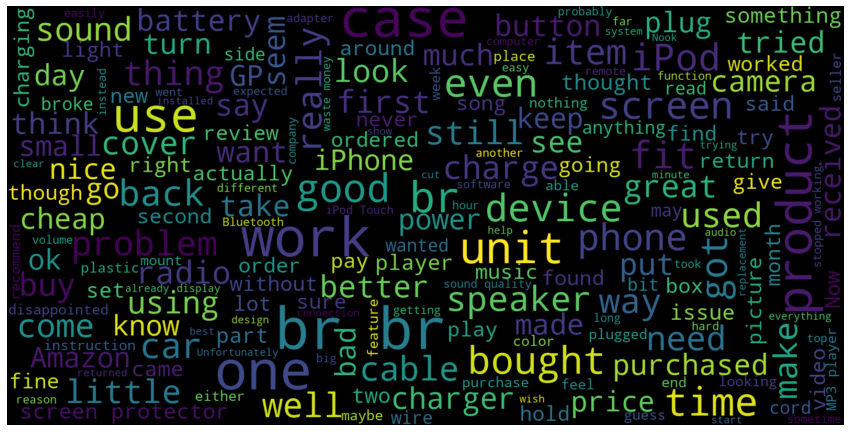

In [14]:
consolidated=' '.join(word for word in df['Review_logic'][df['Sentiment_new']==0.0].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

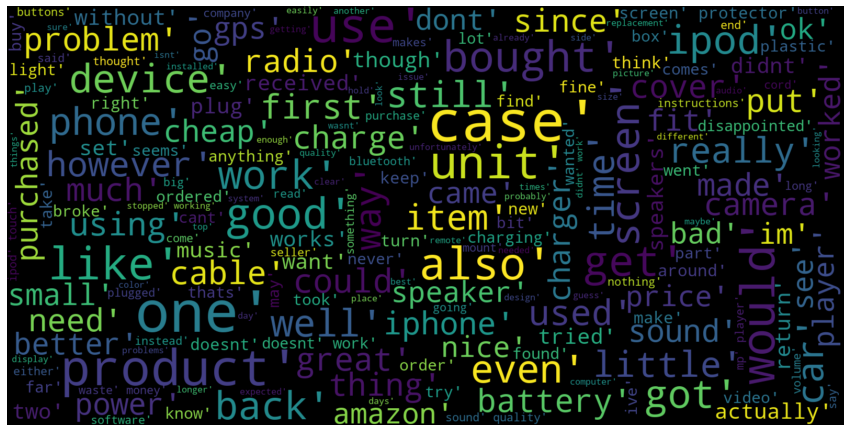

In [15]:
consolidated=' '.join(word for word in df['Review_RNN'][df['Sentiment_new']==0].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(df['Review_logic'] ).toarray()
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.15171041, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [17]:
# one hot encoding
df = pd.get_dummies(df, columns = ['Sentiment'])
y = df[['Sentiment_1', 'Sentiment_2', 'Sentiment_3', 'Sentiment_4', 'Sentiment_5']]

print(X.shape)
print(y.shape)

(24999, 2500)
(24999, 5)


In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(x_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score

pred = forest_model.predict(x_test)
#model accuracy
# print(accuracy_score(y_test,pred))
print(mean_absolute_error(pred, y_test))

In [43]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model.fit(x_train, y_train)

predictions = my_model.predict(x_test)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_test)))

Mean Absolute Error: 0.27282372


In [44]:
my_model = XGBRegressor(n_estimators=500)
my_model.fit(x_train, y_train)

predictions = my_model.predict(x_test)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_test)))

Mean Absolute Error: 0.27539843


In [47]:
my_model = XGBRegressor(n_estimators=500)
my_model.fit(x_train, y_train, early_stopping_rounds=5, eval_set=[(x_test, y_test)], verbose=False)

predictions = my_model.predict(x_test)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_test)))

Mean Absolute Error: 0.2759068


In [48]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(x_train, y_train, early_stopping_rounds=5, eval_set=[(x_test, y_test)], verbose=False)

predictions = my_model.predict(x_test)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_test)))

Mean Absolute Error: 0.27463374


In [49]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
my_model.fit(x_train, y_train, early_stopping_rounds=5, eval_set=[(x_test, y_test)], verbose=False)

predictions = my_model.predict(x_test)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_test)))

Mean Absolute Error: 0.27463374
